In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



In [3]:
# Load dataset
data = pd.read_csv('Bone_Marrow_Disease_Dataset.csv')
print(data.head())       # View first 5 rows
print(data.info())       # Check data types and missing values
print(data.describe())   # Summary statistics for numeric columns

   Age  Gender        WBC       RBC  Hemoglobin    Platelet  \
0   69       0   5.978993  3.803637   15.351762  390.645312   
1   32       0   7.000890  4.431613   13.608711  262.134409   
2   89       1   9.139233  4.139801   13.912038  243.850625   
3   78       0   1.508990  4.929917   14.407389  279.221103   
4   38       1  13.441742  4.330249   15.234046  185.689003   

   BoneMarrowCellularity  AbnormalCells    Calcium  Disease  
0              53.708627              1  10.242184        0  
1              40.196703              0   9.584429        0  
2              36.493422              0   9.369265        0  
3              40.514319              0   8.780079        0  
4              40.720338              0  10.372419        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non

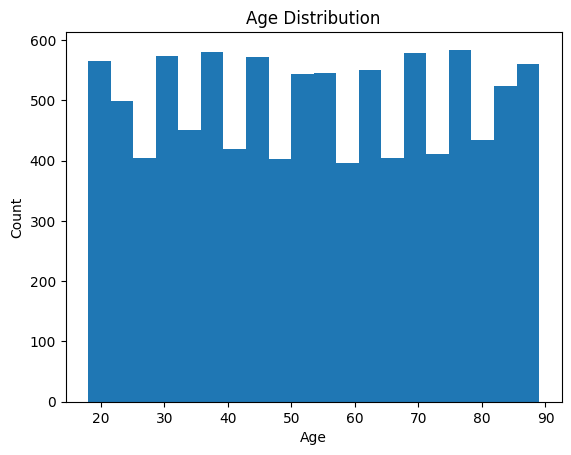

In [4]:
import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


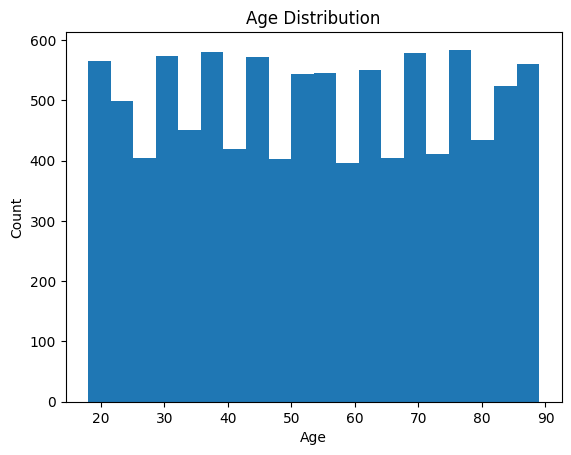

In [5]:
import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


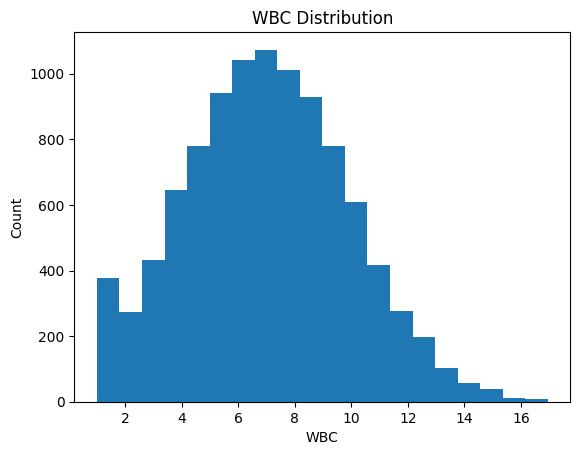

In [6]:
import matplotlib.pyplot as plt

plt.hist(data['WBC'], bins=20)
plt.title('WBC Distribution')
plt.xlabel('WBC')
plt.ylabel('Count')
plt.show()


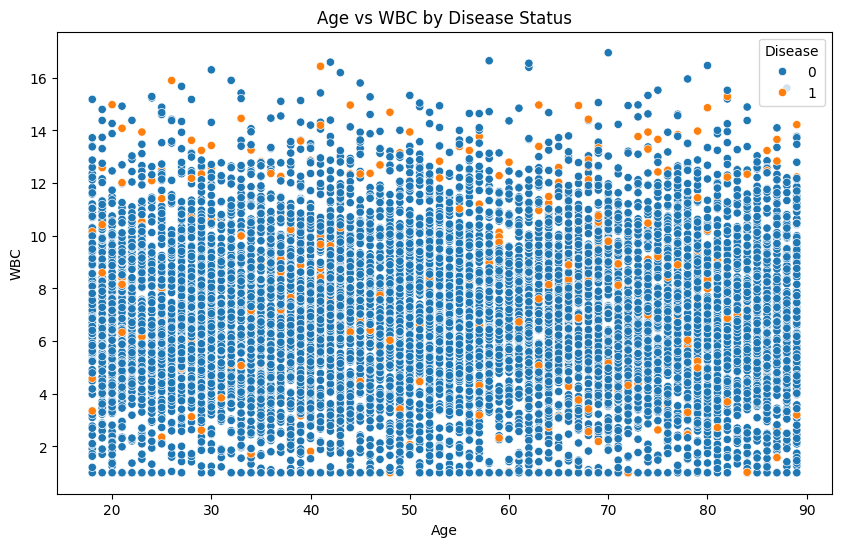

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Age', y='WBC', hue='Disease')
plt.title('Age vs WBC by Disease Status')
plt.show()


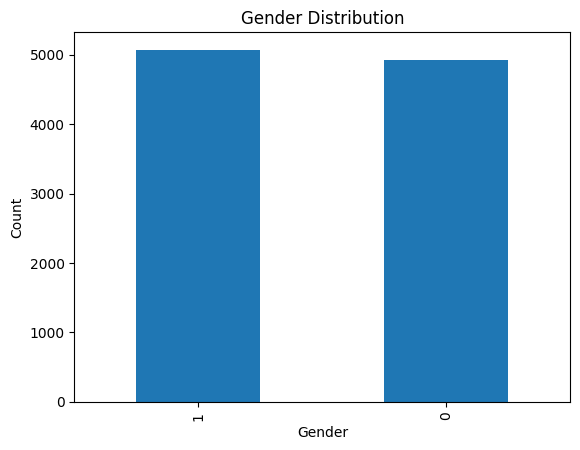

In [8]:
data['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define features and target
X = data.drop(columns=['Disease'])
y = data['Disease']

# Split dataset into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naïve Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42)
}

results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Create results DataFrame sorted by ROC AUC
results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)

print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        Random Forest    1.0000   1.000000  1.000000  1.000000  1.000000
3        Decision Tree    1.0000   1.000000  1.000000  1.000000  1.000000
4          Naïve Bayes    0.8715   0.255072  1.000000  0.406467  0.991020
2                  SVM    0.9560   0.000000  0.000000  0.000000  0.978447
5  Logistic Regression    0.9675   0.694915  0.465909  0.557823  0.975692
1                  KNN    0.9535   0.000000  0.000000  0.000000  0.591839


c:\Users\panth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [11]:
# Load the dataset
data = pd.read_csv('Bone_Marrow_Disease_Dataset.csv')

# Quick look at data
print(data.head())
print(data.info())
print(data.describe())


   Age  Gender        WBC       RBC  Hemoglobin    Platelet  \
0   69       0   5.978993  3.803637   15.351762  390.645312   
1   32       0   7.000890  4.431613   13.608711  262.134409   
2   89       1   9.139233  4.139801   13.912038  243.850625   
3   78       0   1.508990  4.929917   14.407389  279.221103   
4   38       1  13.441742  4.330249   15.234046  185.689003   

   BoneMarrowCellularity  AbnormalCells    Calcium  Disease  
0              53.708627              1  10.242184        0  
1              40.196703              0   9.584429        0  
2              36.493422              0   9.369265        0  
3              40.514319              0   8.780079        0  
4              40.720338              0  10.372419        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non

In [12]:
# Check for missing values
print(data.isnull().sum())

# Since previous info showed no missing values, if any were present:
# data.fillna(method='ffill', inplace=True)  # or any appropriate method


Age                      0
Gender                   0
WBC                      0
RBC                      0
Hemoglobin               0
Platelet                 0
BoneMarrowCellularity    0
AbnormalCells            0
Calcium                  0
Disease                  0
dtype: int64


In [13]:
# Initialize scaler
scaler = StandardScaler()

# Features to scale (all except target)
features = data.drop(columns=['Disease'])

# Fit scaler on features and transform
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(features_scaled, columns=features.columns)


In [14]:
# Target variable
y = data['Disease']

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Predict on test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000


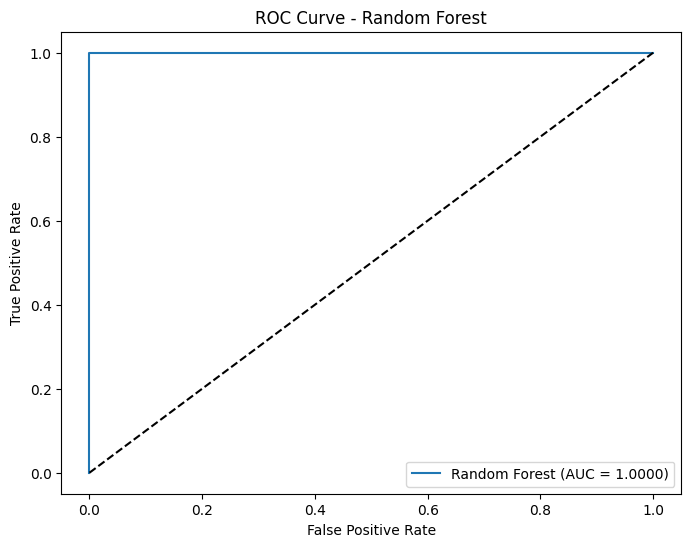

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


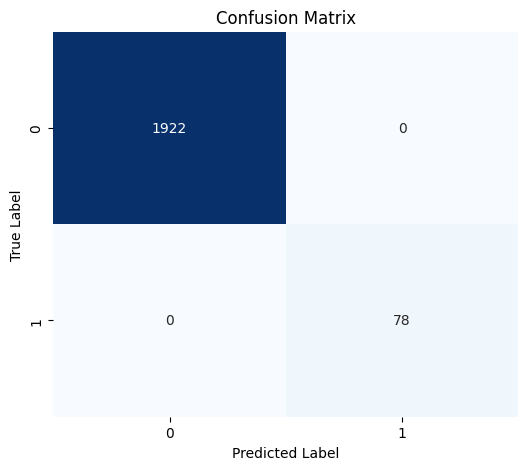

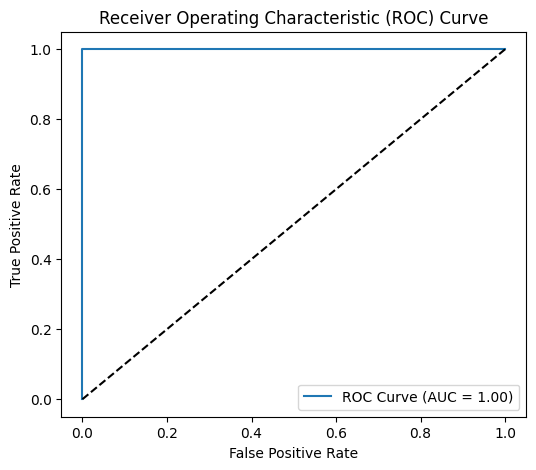

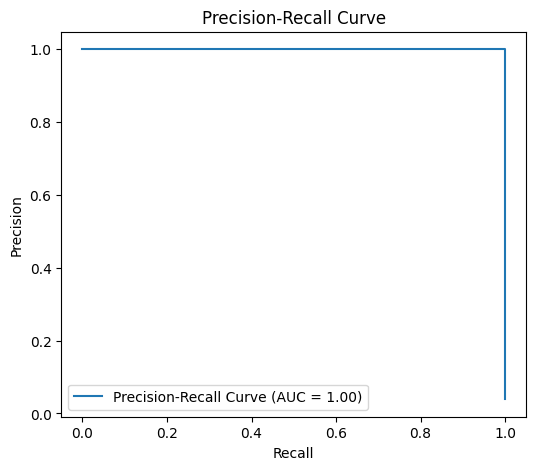

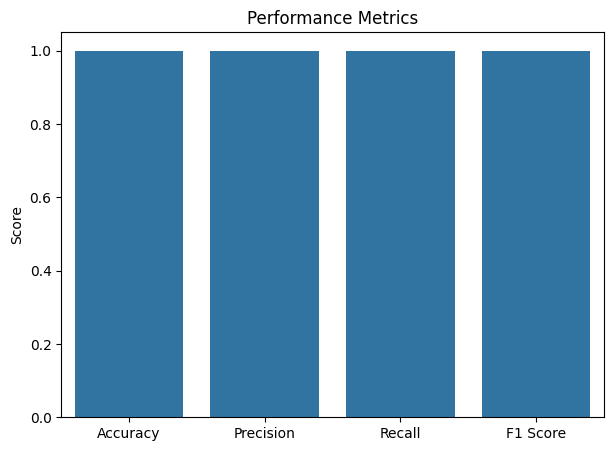

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# Assuming y_test, y_pred, y_prob are defined from your model

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Bar Chart for main metrics
accuracy = accuracy_score(y_test, y_pred)
precision_val = precision_score(y_test, y_pred)
recall_val = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Accuracy': accuracy, 'Precision': precision_val, 'Recall': recall_val, 'F1 Score': f1}
plt.figure(figsize=(7,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1.05)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()


In [19]:
import numpy as np
import pandas as pd

# Features expected by the model (same order as training)
feature_columns = ['Age', 'Gender', 'WBC', 'RBC', 'Hemoglobin', 'Platelet', 'BoneMarrowCellularity', 'AbnormalCells', 'Calcium']

def predict_disease(patient_data):
    """
    patient_data: dict with keys as feature names and values as patient measurements
    """
    # Convert input data to DataFrame
    df = pd.DataFrame([patient_data], columns=feature_columns)
    
    # Scale the features using the existing scaler
    df_scaled = scaler.transform(df)
    
    # Predict class (0 = no disease, 1 = disease)
    prediction = rf_model.predict(df_scaled)[0]
    
    # Print result
    if prediction == 1:
        print("Prediction: The patient HAS bone marrow disease.")
    else:
        print("Prediction: The patient does NOT have bone marrow disease.")
    
    return prediction

# Example usage:
new_patient = {
    'Age': 45,
    'Gender': 1,
    'WBC': 7.5,
    'RBC': 4.1,
    'Hemoglobin': 13.5,
    'Platelet': 250,
    'BoneMarrowCellularity': 45,
    'AbnormalCells': 0,
    'Calcium': 9.8
}

predict_disease(new_patient)


Prediction: The patient does NOT have bone marrow disease.


c:\Users\panth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


np.int64(0)

In [20]:
# Define features and target
X = data.drop(columns=['Disease'])
y = data['Disease']

# Define models to test
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Different train-test split ratios
split_ratios = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Evaluate models
results = []

for model_name, model in models.items():
    for train_size, test_size in split_ratios:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=train_size, random_state=42, shuffle=True
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append({
            "Model": model_name,
            "Train Size": train_size,
            "Test Size": test_size,
            "Accuracy": round(accuracy, 4),
            "F1 Score": round(f1, 4)
        })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Size  Test Size  Accuracy  F1 Score
0        Random Forest         0.8        0.2    1.0000    1.0000
1        Random Forest         0.7        0.3    1.0000    1.0000
2        Random Forest         0.6        0.4    1.0000    1.0000
3  Logistic Regression         0.8        0.2    0.9675    0.5455
4  Logistic Regression         0.7        0.3    0.9647    0.4700
5  Logistic Regression         0.6        0.4    0.9673    0.4903


In [21]:
import joblib
# Save the trained model to a file
model = RandomForestClassifier()
model.fit(X_train, y_train)
joblib.dump(model, "bonemarror.pkl")


['bonemarror.pkl']